In [5]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import io 

In [9]:
dataset = pd.read_csv('F:/Data_Set/cancer_datasets.csv')  

In [10]:
dataset.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Benign = 357
Malignanat = 212


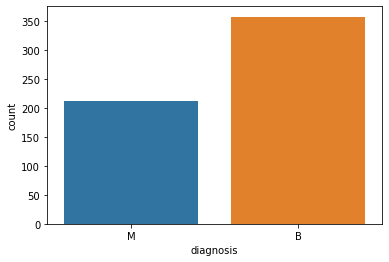

In [12]:
ax = sns.countplot(dataset['diagnosis'],label= 'Count')
B,M = dataset['diagnosis'].value_counts() 
print("Benign = {}".format(B)) 
print("Malignanat = {}".format(M)) 

Delete last Column because it contain all NAN Values

In [13]:
del dataset['Unnamed: 32']

#### Work on Data Preprocessing

#### 1. Devide Data into dependent and independent Variables

In [15]:
x = dataset.iloc[:,2:].values

y = dataset.iloc[:,1].values

#### 2. Encoding Categorical Data

In [21]:
from sklearn.preprocessing import LabelEncoder

labelencoder_x_1 = LabelEncoder()

y = labelencoder_x_1.fit_transform(y)  

#### 3. Spliting the dataset into Traning set and Test set

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0) 


#### 4. Feauture Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test) 

In [26]:
x_train

array([[-0.52787029,  2.49821982, -0.59939466, ..., -1.74713139,
        -0.79044533, -0.91054389],
       [-0.55333608,  0.29431013, -0.60759343, ..., -0.62275667,
        -0.33646358, -0.83551633],
       [ 2.15452653,  0.40392257,  2.26525805, ...,  1.03846122,
        -0.11504791,  0.26488788],
       ...,
       [-1.3297598 , -0.21876938, -1.32088704, ..., -0.98271999,
        -0.718764  , -0.13637062],
       [-1.24940108, -0.24209117, -1.2835826 , ..., -1.74713139,
        -1.58690456, -1.01280367],
       [-0.74291476,  1.08958336, -0.71827692, ..., -0.2865488 ,
        -1.26354211,  0.19486216]])

In [27]:
x_test

array([[-0.19207516,  0.21655218, -0.11542614, ...,  1.60315155,
         1.38812047,  1.39561107],
       [-0.24797128,  1.29875111, -0.31114085, ..., -0.76400211,
        -0.79834577, -0.93437281],
       [-0.00967731, -0.89539007, -0.07447263, ..., -0.40317641,
        -1.38855752, -0.97661799],
       ...,
       [-0.46861385,  0.07241152, -0.46935075, ..., -0.49962508,
        -0.33652424, -0.40576652],
       [-0.75986205, -0.81073603, -0.78878818, ..., -0.67538685,
        -0.01842311,  0.13529668],
       [-0.80399056,  1.71744542, -0.84310547, ..., -1.40405566,
        -0.02225565, -0.77243298]])

Keras Libeary Work Start from here

In [28]:
# pip install keras

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense 

#### Adding the First Input and first hidden layer 

In [36]:
# Adding the first input and first hidden layear

clssifier = Sequential()

clssifier.add(Dense(output_dim=16,init='uniform',activation='relu',input_dim=30))


#Adding Second hidden layer
clssifier.add(Dense(output_dim=16,init='uniform',activation='relu'))

#Adding the Output layer
clssifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid')) 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  """
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':


#### Compile Classifier

We Compile classifier for how to use optimizer weight, Which loss function it contain and how to show the accuracy

In [39]:
clssifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy']) 

#### Train Our ANN with traning and testing with diffrent ephoc

In [41]:
clssifier.fit(x_train,y_train,batch_size=100,nb_epoch=150) 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/150
512/512 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.6719
Epoch 2/150
512/512 [==============================] - 0s 72us/step - loss: 0.6908 - accuracy: 0.7617
Epoch 3/150
512/512 [==============================] - 0s 32us/step - loss: 0.6875 - accuracy: 0.8691
Epoch 4/150
512/512 [==============================] - 0s 31us/step - loss: 0.6818 - accuracy: 0.9160
Epoch 5/150
512/512 [==============================] - 0s 47us/step - loss: 0.6725 - accuracy: 0.9238
Epoch 6/150
512/512 [==============================] - 0s 47us/step - loss: 0.6585 - accuracy: 0.9336
Epoch 7/150
512/512 [==============================] - 0s 47us/step - loss: 0.6378 - accuracy: 0.9336
Epoch 8/150
512/512 [==============================] - 0s 31us/step - loss: 0.6104 - accuracy: 0.9336
Epoch 9/150
512/512 [==============================] - 0s 47us/step - loss: 0.5779 - accuracy: 0.9355
Epoch 10/150
512/512 [==============================] - 0s 47us/step - loss: 0.5412

In [42]:
x_test

array([[-0.19207516,  0.21655218, -0.11542614, ...,  1.60315155,
         1.38812047,  1.39561107],
       [-0.24797128,  1.29875111, -0.31114085, ..., -0.76400211,
        -0.79834577, -0.93437281],
       [-0.00967731, -0.89539007, -0.07447263, ..., -0.40317641,
        -1.38855752, -0.97661799],
       ...,
       [-0.46861385,  0.07241152, -0.46935075, ..., -0.49962508,
        -0.33652424, -0.40576652],
       [-0.75986205, -0.81073603, -0.78878818, ..., -0.67538685,
        -0.01842311,  0.13529668],
       [-0.80399056,  1.71744542, -0.84310547, ..., -1.40405566,
        -0.02225565, -0.77243298]])

#### Predicting the Test set reults

In [46]:
y_pred = clssifier.predict(x_test)  
y_pred = (y_pred > 0.5) 

#### Making the confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)

#### To See the Confusion Matrix

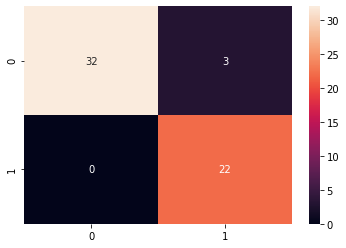

In [48]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')  